In [2]:
using DataFrames, LinearAlgebra, CSV, Plots, Statistics

┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1273


In [3]:
function time_dot(loops_num, lower_size, upper_size, step)
    different_sizes_num = (upper_size - lower_size + step) ÷ step

    types = [String]
    types = vcat(types, [Float64 for i in 1:loops_num])
    col_names = [Symbol("Type | size")]
    col_names = vcat(col_names, [Symbol("$i sample") for i in 1:loops_num])
    measurements = DataFrame(types, col_names, 0)

    for i in lower_size:step:upper_size
        row = []
        push!(row, "Dot product | $i")
        for j in 1:loops_num
            v1 = rand(Int, i)
            v2 = rand(Int, i)
            push!(row, @elapsed LinearAlgebra.dot(v1, v2))
        end
        push!(measurements, row)
    end
    return measurements
end


function time_mlp(loops_num, lower_size, upper_size, step)
    different_sizes_num = (upper_size - lower_size + step) ÷ step

    types = [String]
    types = vcat(types, [Float64 for i in 1:loops_num])
    col_names = [Symbol("Type | size")]
    col_names = vcat(col_names, [Symbol("$i sample") for i in 1:loops_num])
    measurements = DataFrame(types, col_names, 0)

    for i in lower_size:step:upper_size
        row = []
        push!(row, "Matrix and vector MLP | $i")
        for j in 1:loops_num
            m = rand(Int, (i, i))
            v = rand(Int, (i, 1))
            push!(row, @elapsed m * v)
        end
        push!(measurements, row)
    end
    return measurements
end

time_mlp (generic function with 1 method)

In [4]:
LOOPS_NUM = 10

DOT_LOWER = 10000
DOT_UPPER = 10000000
DOT_STEP = 200000
DOT_NUM = (DOT_UPPER - DOT_LOWER + DOT_STEP) ÷ DOT_STEP

MLP_LOWER = 400
MLP_UPPER = 1000
MLP_STEP = 50
MLP_NUM = (MLP_UPPER - MLP_LOWER + MLP_STEP) ÷ MLP_STEP

dot = time_dot(LOOPS_NUM, DOT_LOWER, DOT_UPPER, DOT_STEP)
mlp = time_mlp(LOOPS_NUM, MLP_LOWER, MLP_UPPER, MLP_STEP)
result = vcat(dot, mlp)

,Type | size,1 sample,2 sample,3 sample,4 sample,5 sample
,String,Float64,Float64,Float64,Float64,Float64
1,Dot product | 10000,1.9599e-5,3.0e-6,4.0e-6,3.501e-6,3.6e-6
2,Dot product | 210000,0.0001039,0.0001236,0.0001016,0.000127901,0.000113399
3,Dot product | 410000,0.0002382,0.000229899,0.000247599,0.0002427,0.0002339
4,Dot product | 610000,0.000433699,0.0007253,0.0006976,0.000448599,0.000399101
5,Dot product | 810000,0.0006558,0.000643001,0.0010492,0.0013985,0.000570499
6,Dot product | 1010000,0.0008192,0.001544,0.0011974,0.0010632,0.000855799
7,Dot product | 1210000,0.0013467,0.0010681,0.0010695,0.0011069,0.0011273
8,Dot product | 1410000,0.0014537,0.0015848,0.0014624,0.0017583,0.0012608
9,Dot product | 1610000,0.0014817,0.0014607,0.0014574,0.0014449,0.0015262


In [5]:
CSV.write("lab2.csv", result)

"lab2.csv"

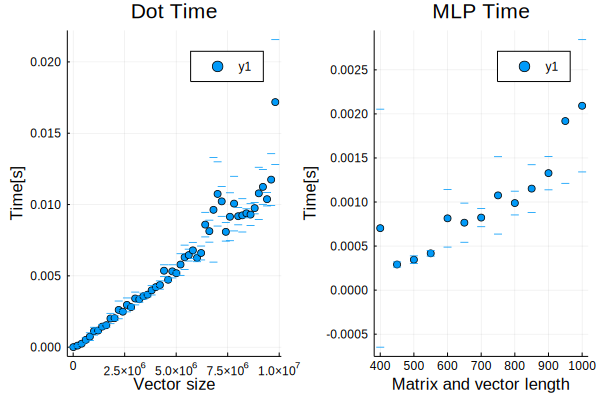

In [6]:
data = CSV.read("lab2.csv")
stds = []
means = []

for row in eachrow(data)
    append!(means, mean(row[2:end]))
    append!(stds, std(row[2:end], mean=means[end]))
end

p1 = scatter(DOT_LOWER:DOT_STEP:DOT_UPPER, means[1:DOT_NUM], yerr=stds[1:DOT_NUM], 
    title="Dot Time", xlabel="Vector size", ylabel="Time[s]")
p2 = scatter(MLP_LOWER:MLP_STEP:MLP_UPPER, means[(DOT_NUM + 1):end], yerr=stds[(DOT_NUM + 1):end], 
    title="MLP Time", xlabel="Matrix and vector length", ylabel="Time[s]")
scatter(p1, p2, layout=2)